# Question 1. Implement LeNet on Cifar-100 dataset
1.Load the cifar 100 dataset. Use the 'coarse' labels. https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar100.load_data(label_mode='coarse')

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


2.Check if there are 20 labels in y_train using np.unique(). 

In [4]:
len(np.unique(y_train))

20

3.More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data. 

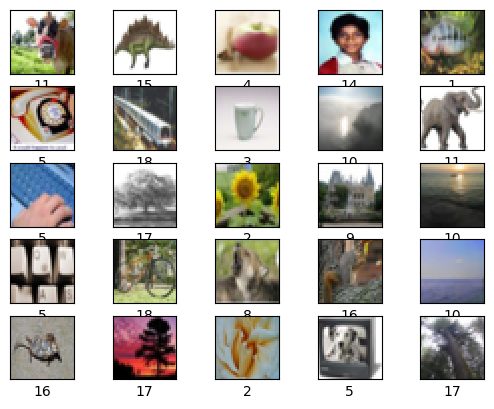

In [5]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i][0])
plt.show()

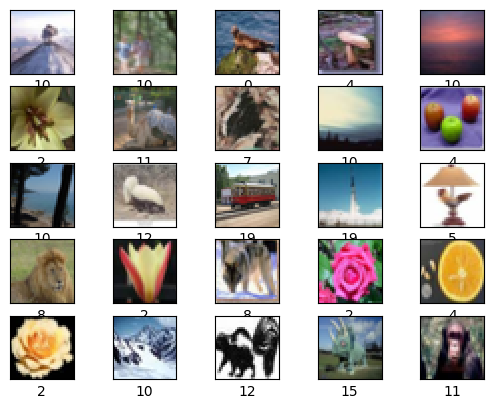

In [6]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(y_test[i][0])
plt.show()

4.Normalize the data. 

In [7]:
x_train=X_train/255
x_test=X_test/255

5.LeNet Since the images are of shape (32,32,3) , we can use LeNet architecture. The first difference is that the images are of RGB format and not grayscale.We just need to change the input shape for that. The second difference is in the number of output classes.

Others remain same.

Import layers and models from tensorflow.keras and build the LeNet architecture. 

In [8]:
from tensorflow.keras import models,layers

In [9]:
model1=models.Sequential(
    [
        layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(16,(5,5),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(120,activation='relu'),
        layers.Dense(84,activation='relu'),
        layers.Dense(20),
    ]
)
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [10]:
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']    
)

In [11]:
model1.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 2.5203 - accuracy: 0.2167
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 2.2175 - accuracy: 0.3134
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 2.0985 - accuracy: 0.3477
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 2.0189 - accuracy: 0.3730
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.9526 - accuracy: 0.3930


In [12]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 471.3561 - accuracy: 0.2200


[471.35614013671875, 0.2199999988079071]

Question 2 : Implement VGGNet - Part 1
Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models.

We can check the VGGNet-16 model. It consists of 16 layers with weights and some maxpooling layers. The architecture could be in the internet (even in the slides).

VGGNet works on images of size (224,224,3). However, we can implement it on (32,32,3). We will see both the approaches. First let's build VGGNet and train it on original image. Then, we will reshape our images from (32,32,3) to (224,224,3) and train VGGNet on them.

The layers are :

1.Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 2.Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 3.MaxPooling . kernel = 2x2. strides = (2,2). 4.Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 5.Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 6.MaxPooling . kernel = 2x2. strides = (2,2). 7.Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 8.Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 9.Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 10.MaxPooling . kernel = 2x2. strides = (2,2). 11.Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 12.Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 13.Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation. 14.MaxPooling . kernel = 2x2. strides = (2,2). 15.Flatten Layer. 16.Dense layer of 4096 neurons. 17.Dense layer of 1000 neurons. 18.Dense layer of 20 neurons. I have omitted the last block of three conv layers of 512 kernels because the output sizes reduces to (1,1,512). You may include it and see. 

In [13]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096))
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Dense(20))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)       

Once you are ready with the model, change runtime to GPU and then train the model, else it will take a lot of time to train it on CPU.

Compile the model using SparseCategoricalCrossentropy Loss Function and accuracy metric. Fit it on the train dataset. and evaluate on the test. 

In [14]:
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=1)

1563/1563 [==============================] - 1172s 750ms/step - loss: 2.8731 - accuracy: 0.1222


In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 31s 96ms/step - loss: 2.5411 - accuracy: 0.1935


[2.5411393642425537, 0.19349999725818634]

# Question 3 : Implement VGGNet - Part 2
Let's see how the image will look like when it gets resized. The cell already has output. But if you had mistakenly run it, you can correct it by verifying the variable names. The X_train here refers to the original image before normalization.

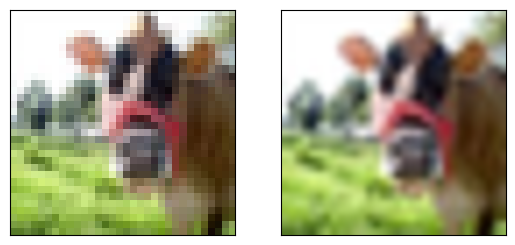

In [18]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_train[0])

from PIL import Image
import numpy as np
pil_image = Image.fromarray(X_train[0])
pil_image = np.array(pil_image.resize((224,224)))
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pil_image)

To resize the dataset from (32,32,3) to (224,224,3) , you may try out defining a function. Then applying it on the whole dataset at once and store the output. However, you may run out of memory while doing so.

To counter that, we have a simple solution. tf.keras.layers.Resizing which will resize the image to shape (224,224) and then Rescaling to normalize the images if not done earlier. This method won't return error as model.fit process only a small batch at a time (default 32) and not the whole dataset.

Now, start building the model for input image shape of (224,224,3). Add input layer of (32,32,3) , Resizing, Rescaling, then the whole model (include all the 5 blocks).

Now, if you want to save some time, reduce the number of neurons in the dense layers.

You may also try out using TPU on this one. Check out how to configure TPU. 

In [19]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [20]:
with strategy.scope():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))
  model.add(tf.keras.layers.Resizing(224,224))
  model.add(tf.keras.layers.Rescaling(scale=1./255))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  # Final layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1000))
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Dense(20))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_9 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      36928     
                                                      

# Question 4 Transfer Learning
In this question, we will implement another CNN architecture on the same dataset. However, we won't build it ourselves. We will use the pre-trained weights of the model already available. This is called Transfer Learning.

Now there are many ways of obtaining those weights : Huggingface, Tensorflow Hub, Pytorch Hub, etc etc etc...

However, we won't look into much details and implement only the models present in keras applications (https://www.tensorflow.org/api_docs/python/tf/keras/applications) .

Choose any of the model and train it on the dataset. As a tutorial, refer to this : https://www.tensorflow.org/tutorials/images/transfer_learning .

The only thing you need to know is what should be the input size for a particular model .

Moreover, since our dataset has only 20 classes and most models returns output of 1000 classes, pass in the parameter include_top=False while calling the model. This will return only the convolution layers. Then, you can add custom Dense layers for classification.

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

In [23]:
preprocess_input = tf.keras.applications.inception_v3.preprocess_input
x_train = preprocess_input(X_train)
x_test = preprocess_input(X_test)

In [24]:
base_model = tf.keras.applications.InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
base_model.trainable = False

87910968/87910968 [==============================] - 24s 0us/step


In [25]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [26]:
with strategy.scope():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))
  model.add(tf.keras.layers.Resizing(299,299))
  model.add(base_model)
  model.add(tf.keras.layers.GlobalAveragePooling2D())
  model.add(tf.keras.layers.Dense(20))
  model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 299, 299, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_9 (Dense)             (None, 20)                40980     
                                                                 
Total params: 21,843,764
Trainable params: 40,980
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
with strategy.scope():
  model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=5)

In [ ]:
with strategy.scope():
  model.evaluate(x_test,y_test)